<a href="https://colab.research.google.com/github/federicotarozzi/Corso_AnalistaProgrammatoreDatiGeoSpaziali/blob/main/Anomalie_siccit%C3%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install cartopy
%pip install colormaps
%pip install rioxarray
%pip install netcdf4
%pip install wget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 697.8/697.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 934.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=398034fb4c39219269a746bdbd5865180c78063d033e3f4a53d1ffaea23d5c08
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import os
import xarray as xr
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpr
import matplotlib
from matplotlib import cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import pandas as pd
import rioxarray as rio
import colormaps as cmaps
from shapely.geometry import mapping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Corso_GeoSp/')

In [ ]:

instruction_1 = "wget -c --no-check-certificate -r -np -nH --user=antonio19812 --password=21011981Aa https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/METREF/NETCDF/"

for i in range(2005,2007):
    for d in range(1,32):
        if d<10:
            istruction_d = '0'+str(d)
        else:
            istruction_d = str(d)
        #print(instruction_1+str(i)+"/03/"+istruction_d+"/NETCDF4_LSASAF_MSG_METREF_MSG-Disk_"+str(i)+"03"+istruction_d+"0000.nc")
        os.system(instruction_1+str(i)+"/01/"+istruction_d+"/NETCDF4_LSASAF_MSG_METREF_MSG-Disk_"+str(i)+"01"+istruction_d+"0000.nc >/dev/null 2>&1"); #>/dev/null 2>&1


In [ ]:
dataset = xr.open_mfdataset('./PRODUCTS/MSG/METREF/NETCDF/**/01/**/*.nc')
dataset

<xarray.Dataset>
Dimensions:       (time: 57, lat: 3201, lon: 3201)
Coordinates:
  * lat           (lat) float32 80.0 79.95 79.9 79.85 ... -79.9 -79.95 -80.0
  * lon           (lon) float32 -80.0 -79.95 -79.9 -79.85 ... 79.9 79.95 80.0
  * time          (time) datetime64[ns] 2005-01-01 2005-01-02 ... 2006-01-31
Data variables:
    METREF        (time, lat, lon) float64 dask.array<chunksize=(1, 3201, 3201), meta=np.ndarray>
    crs           (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b'' b''
    quality_flag  (time, lat, lon) float64 dask.array<chunksize=(1, 3201, 3201), meta=np.ndarray>
Attributes: (12/27)
    date_created:               2020-11-09T16:15:37Z
    algorithm_version:          1.3.2
    base_algorithm_version:     1.0.3
    processing_level:           03
    platform:                   MSG1
    sensor:                     SEVI
    ...                         ...
    westernmost_longitude:      80.0
    spatial_resolution:          0.05x 0.05
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    Conventions:                CF-1.6
    netcdf_version_id:          netCDF4

In [ ]:
monthly_val = dataset.sum('time')
monthly_val

<xarray.Dataset>
Dimensions:       (lat: 3201, lon: 3201)
Coordinates:
  * lat           (lat) float32 80.0 79.95 79.9 79.85 ... -79.9 -79.95 -80.0
  * lon           (lon) float32 -80.0 -79.95 -79.9 -79.85 ... 79.9 79.95 80.0
Data variables:
    METREF        (lat, lon) float64 dask.array<chunksize=(3201, 3201), meta=np.ndarray>
    quality_flag  (lat, lon) float64 dask.array<chunksize=(3201, 3201), meta=np.ndarray>

In [ ]:
cropped_ds = dataset.sel(lat=slice(-3,-35), lon=slice(9,43))
cropped_ds

<xarray.Dataset>
Dimensions:       (time: 57, lat: 641, lon: 681)
Coordinates:
  * lat           (lat) float32 -3.0 -3.05 -3.1 -3.15 ... -34.9 -34.95 -35.0
  * lon           (lon) float32 9.0 9.05 9.1 9.15 9.2 ... 42.85 42.9 42.95 43.0
  * time          (time) datetime64[ns] 2005-01-01 2005-01-02 ... 2006-01-31
Data variables:
    METREF        (time, lat, lon) float64 dask.array<chunksize=(1, 641, 681), meta=np.ndarray>
    crs           (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b'' b''
    quality_flag  (time, lat, lon) float64 dask.array<chunksize=(1, 641, 681), meta=np.ndarray>
Attributes: (12/27)
    date_created:               2020-11-09T16:15:37Z
    algorithm_version:          1.3.2
    base_algorithm_version:     1.0.3
    processing_level:           03
    platform:                   MSG1
    sensor:                     SEVI
    ...                         ...
    westernmost_longitude:      80.0
    spatial_resolution:          0.05x 0.05
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    Conventions:                CF-1.6
    netcdf_version_id:          netCDF4

In [ ]:
monthly = cropped_ds.groupby('time.year').sum('time')
monthly

<xarray.Dataset>
Dimensions:       (year: 2, lat: 641, lon: 681)
Coordinates:
  * lat           (lat) float32 -3.0 -3.05 -3.1 -3.15 ... -34.9 -34.95 -35.0
  * lon           (lon) float32 9.0 9.05 9.1 9.15 9.2 ... 42.85 42.9 42.95 43.0
  * year          (year) int64 2005 2006
Data variables:
    METREF        (year, lat, lon) float64 dask.array<chunksize=(1, 641, 681), meta=np.ndarray>
    quality_flag  (year, lat, lon) float64 dask.array<chunksize=(1, 641, 681), meta=np.ndarray>
Attributes: (12/27)
    date_created:               2020-11-09T16:15:37Z
    algorithm_version:          1.3.2
    base_algorithm_version:     1.0.3
    processing_level:           03
    platform:                   MSG1
    sensor:                     SEVI
    ...                         ...
    westernmost_longitude:      80.0
    spatial_resolution:          0.05x 0.05
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    Conventions:                CF-1.6
    netcdf_version_id:          netCDF4

In [ ]:
monthly_clim = monthly.mean('year')
monthly_clim

<xarray.Dataset>
Dimensions:       (lat: 641, lon: 681)
Coordinates:
  * lat           (lat) float32 -3.0 -3.05 -3.1 -3.15 ... -34.9 -34.95 -35.0
  * lon           (lon) float32 9.0 9.05 9.1 9.15 9.2 ... 42.85 42.9 42.95 43.0
Data variables:
    METREF        (lat, lon) float64 dask.array<chunksize=(641, 681), meta=np.ndarray>
    quality_flag  (lat, lon) float64 dask.array<chunksize=(641, 681), meta=np.ndarray>

In [ ]:
for i in range(2024,2025):
    for d in range(1,32):
        if d<10:
            istruction_d = '0'+str(d)
        else:
            istruction_d = str(d)
        #print(instruction_1+str(i)+"/03/"+istruction_d+"/NETCDF4_LSASAF_MSG_METREF_MSG-Disk_"+str(i)+"03"+istruction_d+"0000.nc")
        os.system(instruction_1+str(i)+"/01/"+istruction_d+"/NETCDF4_LSASAF_MSG_METREF_MSG-Disk_"+str(i)+"01"+istruction_d+"0000.nc >/dev/null 2>&1"); #>/dev/null 2>&1


In [ ]:
dataset_new = xr.open_mfdataset('./PRODUCTS/MSG/METREF/NETCDF/2024/01/**/*.nc')
dataset_new

<xarray.Dataset>
Dimensions:       (time: 31, lat: 3201, lon: 3201)
Coordinates:
  * lat           (lat) float32 80.0 79.95 79.9 79.85 ... -79.9 -79.95 -80.0
  * lon           (lon) float32 -80.0 -79.95 -79.9 -79.85 ... 79.9 79.95 80.0
  * time          (time) datetime64[ns] 2024-01-01 2024-01-02 ... 2024-01-31
Data variables:
    METREF        (time, lat, lon) float64 dask.array<chunksize=(1, 3201, 3201), meta=np.ndarray>
    crs           (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b'' b''
    quality_flag  (time, lat, lon) float64 dask.array<chunksize=(1, 3201, 3201), meta=np.ndarray>
Attributes: (12/27)
    date_created:               2024-01-02T00:23:52Z
    algorithm_version:          2.0.0
    base_algorithm_version:     1.0.3
    processing_level:           03
    platform:                   MSG3
    sensor:                     SEVI
    ...                         ...
    westernmost_longitude:      80.0
    spatial_resolution:          0.05x 0.05
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    Conventions:                CF-1.6
    netcdf_version_id:          netCDF4

In [ ]:
cropped_new = dataset_new.sel(lat=slice(-3,-35), lon=slice(9,43))
cropped_new

<xarray.Dataset>
Dimensions:       (time: 31, lat: 641, lon: 681)
Coordinates:
  * lat           (lat) float32 -3.0 -3.05 -3.1 -3.15 ... -34.9 -34.95 -35.0
  * lon           (lon) float32 9.0 9.05 9.1 9.15 9.2 ... 42.85 42.9 42.95 43.0
  * time          (time) datetime64[ns] 2024-01-01 2024-01-02 ... 2024-01-31
Data variables:
    METREF        (time, lat, lon) float64 dask.array<chunksize=(1, 641, 681), meta=np.ndarray>
    crs           (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b'' b''
    quality_flag  (time, lat, lon) float64 dask.array<chunksize=(1, 641, 681), meta=np.ndarray>
Attributes: (12/27)
    date_created:               2024-01-02T00:23:52Z
    algorithm_version:          2.0.0
    base_algorithm_version:     1.0.3
    processing_level:           03
    platform:                   MSG3
    sensor:                     SEVI
    ...                         ...
    westernmost_longitude:      80.0
    spatial_resolution:          0.05x 0.05
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    Conventions:                CF-1.6
    netcdf_version_id:          netCDF4

In [ ]:
monthly_val = cropped_new.sum('time')
monthly_val

<xarray.Dataset>
Dimensions:       (lat: 641, lon: 681)
Coordinates:
  * lat           (lat) float32 -3.0 -3.05 -3.1 -3.15 ... -34.9 -34.95 -35.0
  * lon           (lon) float32 9.0 9.05 9.1 9.15 9.2 ... 42.85 42.9 42.95 43.0
Data variables:
    METREF        (lat, lon) float64 dask.array<chunksize=(641, 681), meta=np.ndarray>
    quality_flag  (lat, lon) float64 dask.array<chunksize=(641, 681), meta=np.ndarray>

In [ ]:
anom = monthly_val - monthly_clim
anom

<xarray.Dataset>
Dimensions:       (lat: 641, lon: 681)
Coordinates:
  * lat           (lat) float32 -3.0 -3.05 -3.1 -3.15 ... -34.9 -34.95 -35.0
  * lon           (lon) float32 9.0 9.05 9.1 9.15 9.2 ... 42.85 42.9 42.95 43.0
Data variables:
    METREF        (lat, lon) float64 dask.array<chunksize=(641, 681), meta=np.ndarray>
    quality_flag  (lat, lon) float64 dask.array<chunksize=(641, 681), meta=np.ndarray>

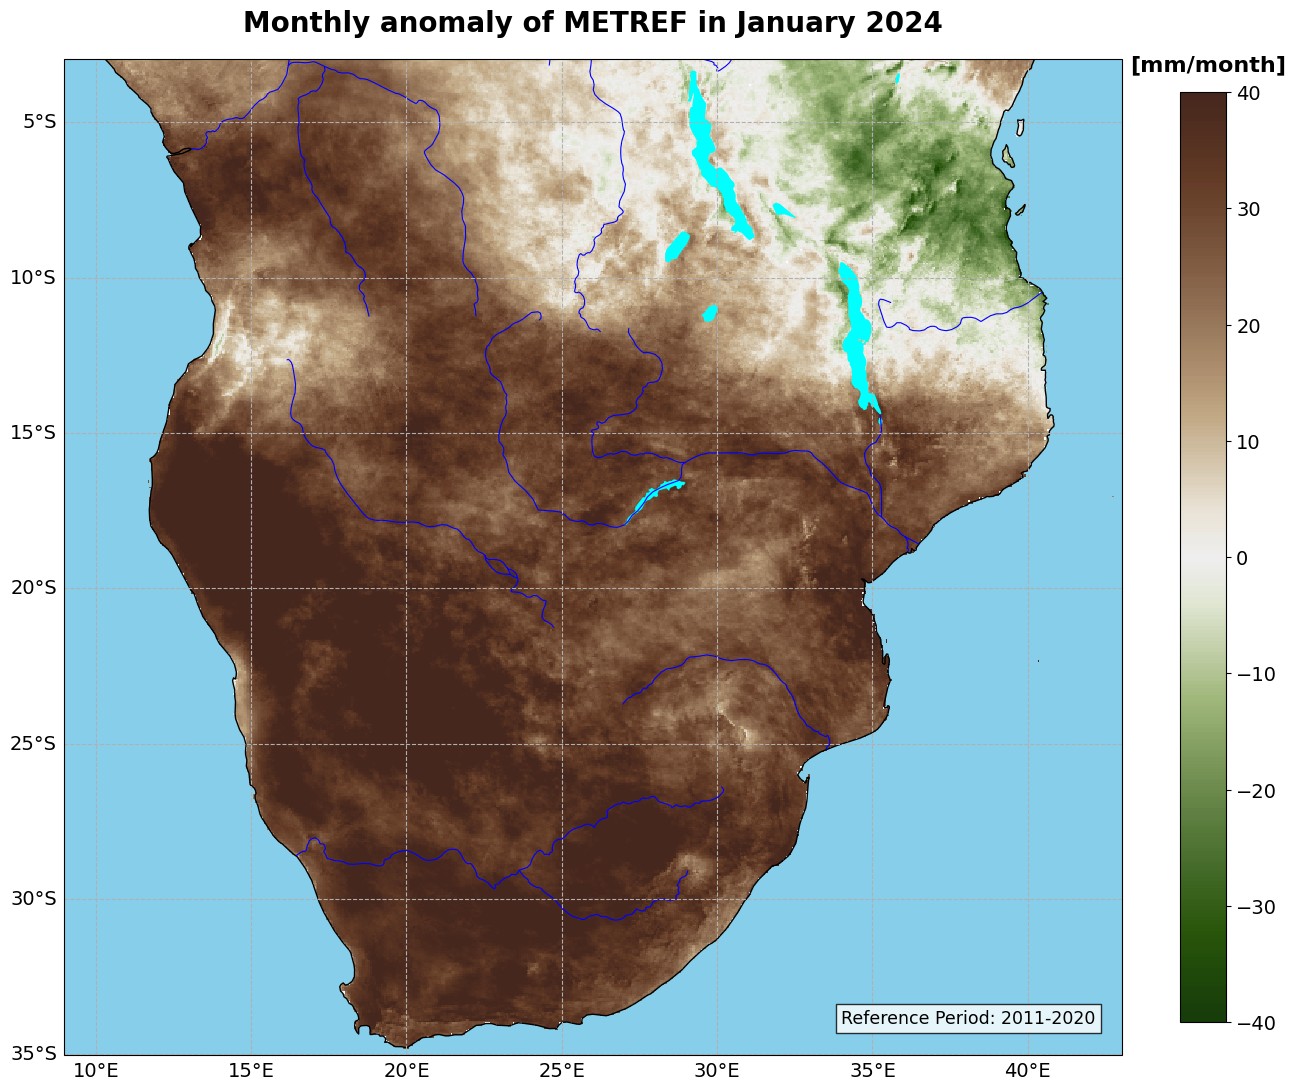

In [ ]:
fig=plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.PlateCarree())
anom_val = anom.METREF.values
anom_val[anom_val==0] = np.NaN
cmap = cmaps.NEO_div_vegetation_b


img = plt.pcolormesh(anom.lon,anom.lat, anom_val,
                        cmap=cmap.reversed(),transform=ccrs.PlateCarree(),
                        vmin=-40,
                        vmax=+40,
                        shading='auto')

#ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)
#ax.add_feature(cfeature.OCEAN, facecolor='lightcyan', linewidth=1)
ax.add_feature(cfeature.OCEAN, facecolor='skyblue', linewidth=1)
ax.add_feature(cfeature.LAKES,facecolor='aqua')
ax.add_feature(cfeature.RIVERS,edgecolor = 'blue',linewidth = 0.8)
plt.text(34, -34, 'Reference Period: 2011-2020', fontsize = 12.5,color = 'black',
         bbox = dict(facecolor = 'white', alpha = 0.8))
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

cbar = fig.colorbar(img, ax=ax, orientation='vertical', fraction=0.04, pad=0.05)
cbar.set_label('[mm/month]', fontsize=16, rotation =0, y=1.04, labelpad = -50, weight = 'bold')
cbar.ax.tick_params(labelsize=14)
ax.set_title('Monthly anomaly of METREF in January 2024', fontsize=20, pad=20.0, fontweight = 'bold')
plt.savefig('Anom_METREF_JAN24_2011-2020.png',bbox_inches='tight',dpi=300)
plt.show()